In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('DSL-StrongPasswordData.csv')

In [3]:
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [4]:
data.shape

(20400, 34)

In [5]:
X = data.iloc[:,3:]
y = data.iloc[:,0]

In [6]:
y_onehot = pd.get_dummies(y).values

print(y_onehot.shape)

(20400, 51)


In [7]:
from sklearn.model_selection import train_test_split
import random

In [8]:
random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.4, random_state=0, stratify=y_onehot)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12240, 31)
(12240, 51)
(8160, 31)
(8160, 51)


In [9]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [10]:
# #preparing the data for training
# n=400  #number of samples to be considered per user
# tS = 0.6 #training %
# tot = 51 #number of users

# X_train = np.zeros((int(tS*n)*tot,31))
# y_train = np.zeros((int(tS*n)*tot,tot))
# X_test = np.zeros((int((1-tS)*n)*tot,31))
# y_test = np.zeros((int((1-tS)*n)*tot,tot))

# for i in range(1,tot):
#     #print((i-1)*n,n+(i-1)*n)
#     a = X.iloc[(i-1)*n:n+(i-1)*n,:]
#     b = y_onehot[(i-1)*n:n+(i-1)*n,:]
#     X_tn, X_tt, y_tn, y_tt = train_test_split(a, b, test_size=0.4,random_state=42,shuffle=True)
#     s = int(0.6*n)
#     s1 = int(0.4*n)
#     #print(y_tn)
#     X_train[(i-1)*s:s+(i-1)*s,:] = X_tn
#     y_train[(i-1)*s:s+(i-1)*s,:] = y_tn
#     X_test[(i-1)*s1:s1+(i-1)*s1,:] = X_tt
#     y_test[(i-1)*s1:s1+(i-1)*s1,:] = y_tt
    
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,Activation

In [12]:
model = Sequential() 

model.add( Dense(units=30,input_shape=(31,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(units=25))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(units =51,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                960       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)                100       
_________________________________________________________________
activation_1 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 51)                1

In [13]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train,y_train,epochs=100,batch_size=20,validation_split=0.2)

Train on 9792 samples, validate on 2448 samples
Epoch 1/100
9792/9792 [==============================] - 3s 308us/sample - loss: 0.0182 - accuracy: 0.1486 - val_loss: 0.0174 - val_accuracy: 0.2443
Epoch 2/100
9792/9792 [==============================] - 2s 255us/sample - loss: 0.0151 - accuracy: 0.3713 - val_loss: 0.0138 - val_accuracy: 0.4943
Epoch 3/100
9792/9792 [==============================] - 2s 230us/sample - loss: 0.0122 - accuracy: 0.5261 - val_loss: 0.0106 - val_accuracy: 0.6471
Epoch 4/100
9792/9792 [==============================] - 3s 274us/sample - loss: 0.0103 - accuracy: 0.6151 - val_loss: 0.0089 - val_accuracy: 0.6916
Epoch 5/100
9792/9792 [==============================] - 3s 272us/sample - loss: 0.0090 - accuracy: 0.6706 - val_loss: 0.0094 - val_accuracy: 0.6712
Epoch 6/100
9792/9792 [==============================] - 3s 268us/sample - loss: 0.0082 - accuracy: 0.7023 - val_loss: 0.0073 - val_accuracy: 0.7373
Epoch 7/100
9792/9792 [==============================] - 2

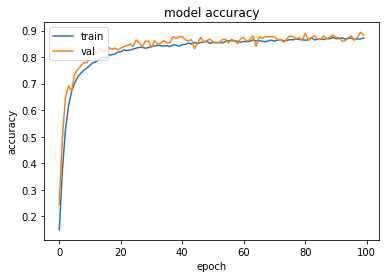

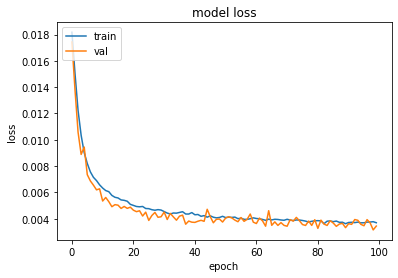

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model.evaluate(X_test, y_test,verbose=False)[1]

0.8835784

In [29]:

from sklearn.metrics import roc_curve, auc,confusion_matrix

In [27]:
pred = model.predict(X_test)
y_hat = np.asarray([np.argmax(line) for line in pred])
y_test1 = np.asarray([np.argmax(line) for line in y_test])
matrix = confusion_matrix(y_test1,y_hat )
print(matrix)

[[121   1   2 ...   0   0   0]
 [  1 137   3 ...   0   0   0]
 [  1   2 142 ...   0   0   0]
 ...
 [  3   0   0 ... 146   2   0]
 [  2   0   0 ...   3 138   0]
 [  0   0   0 ...   0   0 120]]


In [31]:
fpr2, tpr2, threshold = roc_curve(y_test1,y_hat)

ValueError: multiclass format is not supported